In [15]:
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.layers import MaxPool2D,Dense,Conv2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators
train_dataset=keras.utils.image_dataset_from_directory(
    directory="C:/Users/mihir/OneDrive/Documents/DataSets/Dog_Cate/train",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)

#generators
validation_dataset=keras.utils.image_dataset_from_directory(
    directory="C:/Users/mihir/OneDrive/Documents/DataSets/Dog_Cate/test",
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [6]:
#Normalize the value 
def process(image,label):
    image=tf.cast(image/255.,tf.float32)
    return image,label
train_dataset=train_dataset.map(process)
validation_dataset=validation_dataset.map(process)

In [16]:
#CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history1=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
18/18 [==============================] - 39s 2s/step - loss: 8.1168 - accuracy: 0.5350 - val_loss: 1.7101 - val_accuracy: 0.5071
Epoch 2/10
18/18 [==============================] - 37s 2s/step - loss: 7.6170 - accuracy: 0.6212 - val_loss: 8.6757 - val_accuracy: 0.5000
Epoch 3/10
18/18 [==============================] - 37s 2s/step - loss: 5.1803 - accuracy: 0.6625 - val_loss: 2.6396 - val_accuracy: 0.5071
Epoch 4/10
18/18 [==============================] - 39s 2s/step - loss: 4.0822 - accuracy: 0.6248 - val_loss: 4.8354 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 42s 2s/step - loss: 3.3552 - accuracy: 0.6697 - val_loss: 6.7169 - val_accuracy: 0.5000
Epoch 6/10
18/18 [==============================] - 206s 12s/step - loss: 2.1632 - accuracy: 0.7343 - val_loss: 5.8398 - val_accuracy: 0.5000
Epoch 7/10
18/18 [==============================] - 38s 2s/step - loss: 1.7126 - accuracy: 0.7684 - val_loss: 5.1863 - val_accuracy: 0.5000
Epoch 8/10
18/18 [

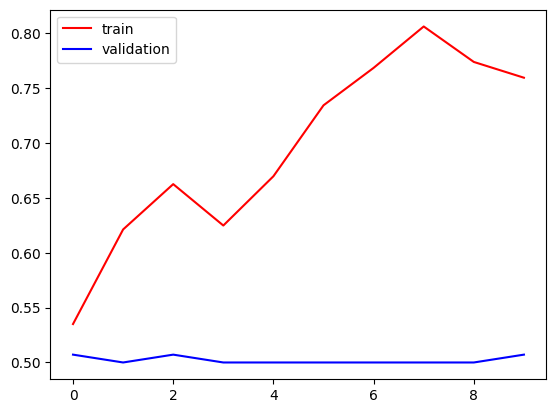

In [20]:
import matplotlib.pylab as plt

plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

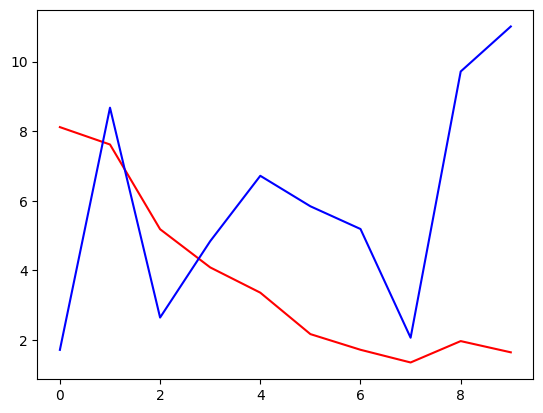

In [21]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')

In [14]:
#Ways to reduce overfitting

#add more datas
#Data augmentation
#l1/L2 regularizer
#Dropout
#Batch Norm
#Reduce complexity